<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data preparation, dimensionality reduction***

###**Tenggat Waktu: 24 September 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab2_2106123456_Goto.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **23 September 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [65]:
# Isi dengan data diri Anda
NAMA = "Yudi Putra Sabri"
KELAS = "D"
NPM = "2106706123"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [66]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yudi Putra Sabri dari kelas D dengan NPM 2106706123, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yudi Putra Sabri)


# Data Preprocessing

*Data Preparation* atau *data preprocessing* adalah suatu proses **pembersihan dan transformasi** pada *raw data* **sebelum** diproses dan dianalisis oleh model Machine Learning. Pernah dengar ungkapan "Garbage In - Garbage Out?", dalam konteks Machine Learning, jika input data yang kita miliki buruk maka hasil pengolahan data pun akan buruk. *Data Preprocessing* dilakukan agar data input sudah berupa data yang akurat dan berkualitas sehingga hasil yang dikeluarkan oleh model bisa optimal.


## Deskripsi Dataset

Dataset ini berisi informasi tentang harga rumah di Tehran, Iran. Dataset ini mencakup sekitar 3500 rumah dan menyediakan informasi lengkap tentang setiap rumah, termasuk harga dalam Dolar Amerika (USD) dan Toman (mata uang Iran), serta beberapa atribut lainnya seperti:

**Area:** mengacu pada ukuran atau luas area rumah dalam satuan persegi.

**Room:** Jumlah kamar tidur dalam rumah.

**Parking:** Indikator boolean yang menunjukkan apakah rumah ini memiliki fasilitas tempat parkir.

**Warehouse:** Indikator boolean yang menunjukkan apakah rumah ini dilengkapi dengan gudang atau ruang penyimpanan tambahan.

**Elevator:** Indikator boolean yang menunjukkan apakah rumah ini memiliki fasilitas lift.

**Address:** Alamat lengkap rumah.

**Price:** Harga rumah dalam bentuk mata uang lokal (dalam kasus ini Toman) .

**Price(USD):** Harga rumah dalam Dolar Amerika (USD).

In [67]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler

In [68]:
# Import dataset
df = pd.read_csv('housePrice.csv')

In [69]:
# Melihat shape dari dataframe
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat 5 elemen pertama dari dataset
df.head()

Jumlah data: 3482
Jumlah atribut: 8


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


*   Kita dapat melihat bahwa terdapat 3482 dengan 8 atribut



In [70]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3474 non-null   object 
 1   Room        3482 non-null   int64  
 2   Parking     3482 non-null   bool   
 3   Warehouse   3482 non-null   bool   
 4   Elevator    3482 non-null   bool   
 5   Address     3459 non-null   object 
 6   Price       3482 non-null   float64
 7   Price(USD)  3482 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.3+ KB


Terdapat beberapa kolom dengan missing values pada kolom area dan address (dapat dilihat dari informasi Non-Null Count dimana data yang lain memiliki Non-null Count sebesar 3482, dan kolom Area dan Adress memiliki nilai kurang dari 3482)

In [71]:
#Melihat deskripsi statistik dataframe
#water_df.drop('Potability', axis=1).describe()
df.describe()

,Room,Price,Price(USD)
count,3482.000000,3.482000e+03,3.482000e+03
mean,2.079552,5.357653e+09,1.785884e+05
std,0.758172,8.096883e+09,2.698961e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.419250e+09,4.730833e+04
50%,2.000000,2.895850e+09,9.652833e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


Berdasarkan deskripsi statistik, kita bisa menyimpulkan beberapa hal:

*   Karena selisih nilai mean-median pada atribut price cukup besar, kita bisa mengetahui bahwa distribusi data atribut tersebut kurang normal
*   Skala nilai pada masing-masing atribut tidak sama, dimana atribut Room memiliki skala yang lebih rendah dengan rentang nilai antara 0 hingga 5, sementara atribut Price dan Price(USD) memiliki skala yang lebih tinggi dengan rentang nilai yang jauh lebih besar, mencapai miliaran dalam mata uang lokal dan jutaan dalam Dolar Amerika.



array([[<Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Price(USD)'}>, <Axes: >]], dtype=object)

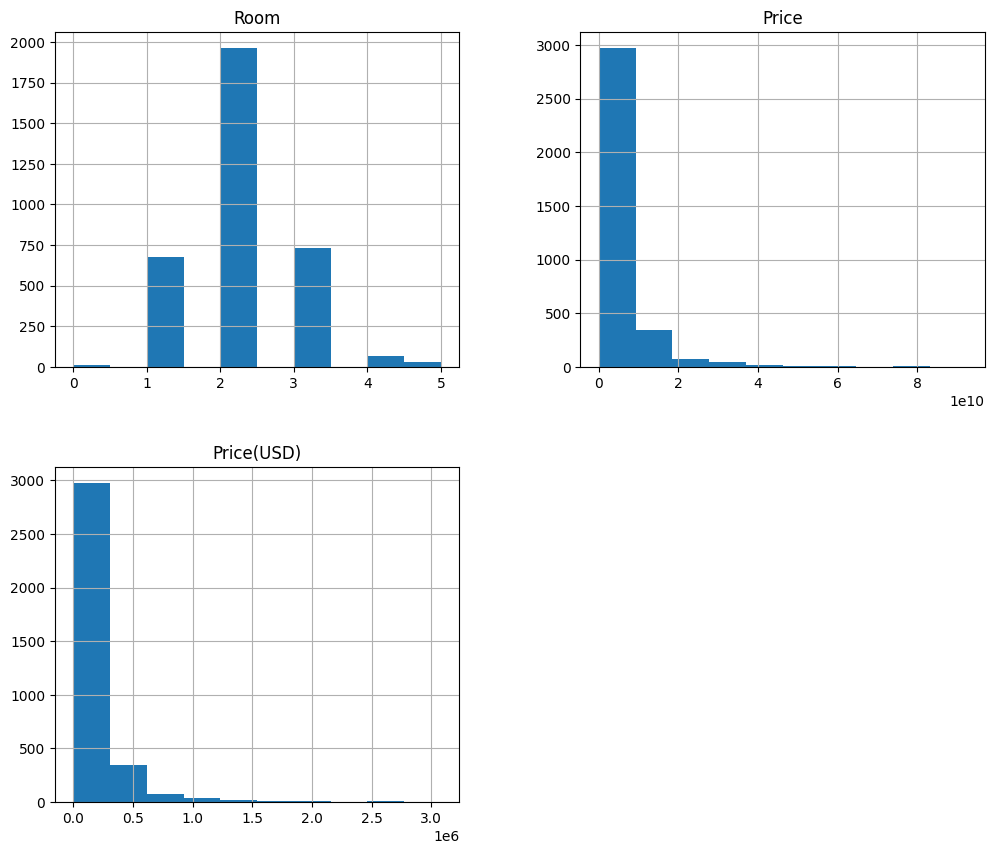

In [72]:
# Melihat distribusi data
df[['Room','Price','Price(USD)']].hist(figsize=(12,10))

Terlihat bahwa distribusi Price dan Price(USD) adalah right skewed, yang berarti sebagian besar data cenderung mengumpul di nilai-nilai rendah dan beberapa nilai ekstrem di sebelah kanan. Hal ini mengindikasikan adanya outliers dengan nilai yang tinggi yang memengaruhi rata-rata dan menyebabkan distribusi menjadi condong ke kanan.

Setelah mengetahui deskripsi dataset yang akan digunakan, kita akan memulai proses *data pre-processing*. Pada pengerjaan lab ini, pre-processing yang akan kita lakukan adalah: penanganan duplikasi data, penanganan outlier, dan penanganan missing value.

## Penanganan Duplikasi Data

Duplikasi data terutama dalam jumlah yang besar dapat mempengaruhi model machine learning, sehingga penanganan terhadap data duplikat harus dilakukan. Umumnya, penanganan duplikasi data dapat dilakukan dengan operasi drop sebagai berikut:

`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

Parameter:

*   subset: digunakan untuk menspesifikasi kolom tertentu yang ingin kita tangani, misalnya hanya dua kolom yang ingin dihapus duplikatnya maka kita bisa mengisi bagian tsb dengan `subset=['kolom1', 'kolom2']`
*   keep: menentukan nilai duplikat mana yang ingin kita simpan, secara default `keep='first'` artinya kemunculan data duplikasi pertama yang akan disimpan pada dataframe dan data berikutnya yang nilainya sama akan dihapus.
*   inplace: apakah akan menghapus data duplikat langsung pada dataframe tersebut (inplace) atau me-*return* copy

(dokumentasi lengkap: [Dokumentasi Drop Duplicate](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.drop_duplicates.html))



**Soal 1(a)** : Dari data  di atas, apakah terdapat redundansi data? Implementasikan dengan code!

In [73]:
# 1(a) Implementasi code di sini
duplicated_free, column = df.drop_duplicates().shape

total_size, column = df.shape
print(f"Real values tanpa duplicate : {duplicated_free}")
print(f"Keseluruhan data : {total_size}")
print(f"Data duplikat ada sebanyak : {total_size - duplicated_free}")

Real values tanpa duplicate : 3272
Keseluruhan data : 3482
Data duplikat ada sebanyak : 210


**Soal 1(b)** : Apa yang dapat Anda lakukan untuk menangani redundansi data tersebut? Implementasikan dengan code!

In [74]:
# 1(b) Implementasi code di sini
df = df.drop_duplicates()

**Soal 1(c)** : Menurut Anda, mengapa redundansi data perlu ditangani?

> Berikan jawaban Anda di sini :

Karena dengan adanya data duplikat, berarti data tersebut menyimpan informasi yang sama dengan data lainnya sehingga hal tersebut hanya merugikan mesin agar melakukan komputasi lebih banyak. Selain itu, data redundan juga dapat menghasilkan analisis yang salah serta lebih banyak cost untuk melakukan maintain data.

## Penanganan Outlier

Outlier merupakan observasi yang tidak biasa yang muncul pada salah satu titik ekstrim dari sebagian besar data. Titik ekstrim di sini adalah nilai yang terlalu kecil atau nilai yang terlalu besar jika dibandingkan dengan sebagian besar nilai lain dalam kelompoknya.

### Deteksi Outlier

Deteksi outlier dapat dilakukan dengan beberapa cara, salah satunya dengan menggunakan visualisasi boxplot.

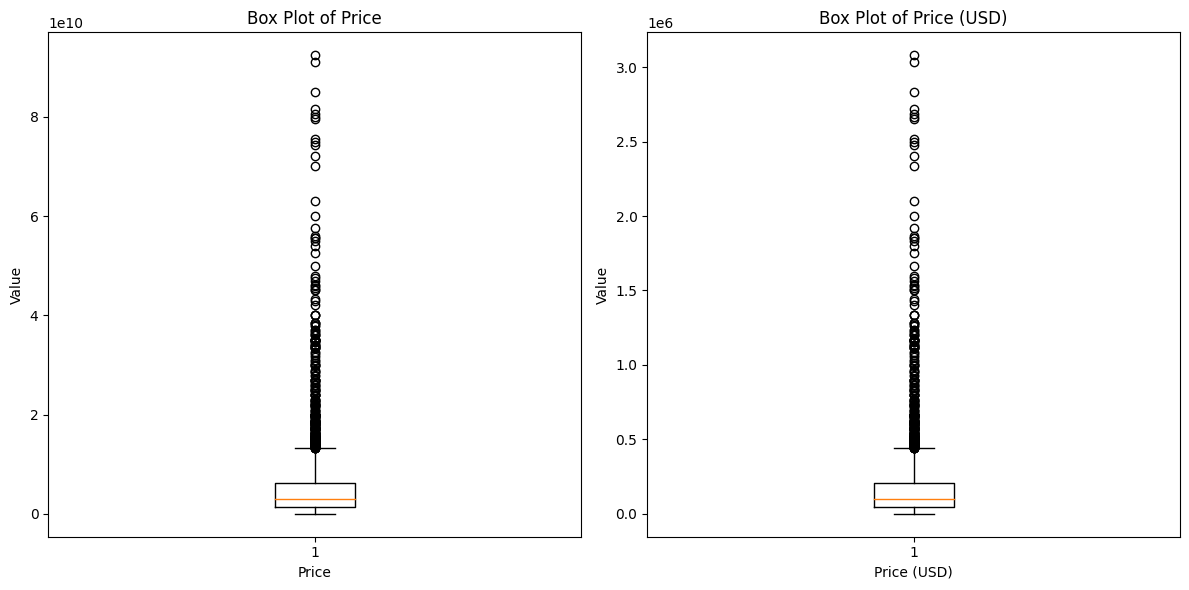

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'data' with 'Price' and 'Price (USD)' columns

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create the first box plot for 'Price'
plt.subplot(1, 2, 1)
plt.boxplot(df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.ylabel('Value')

# Create the second box plot for 'Price (USD)'
plt.subplot(1, 2, 2)
plt.boxplot(df['Price(USD)'])
plt.title('Box Plot of Price (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Value')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


**Soal 2** : Berdasarkan plot diatas, terlihat bahwa fitur price memiliki banyak outliers, menurut kalian mengapa ini dapat terjadi? (hint: elaborasikan dengan kasus di dunia nyata)

> Berikan jawaban Anda disini :
Karena pada dunia nyata, harga perumahan saat ini biasanya mirip-mirip karena mereka cenderung menggunakan cluster-cluster untuk tipe perumahan. Karena banyaknya data rumah untuk 1 cluser, hal itu dapat mempengaruhi median, mean, dan juga modus dari data tersebut. Akan tetapi, terdapat beberapa case seperti orang yang "Butuh Uang" kemudian menjual rumah dibawah harga pasar serta mafia properti atau orang kaya yang menjual dengan harga yang sangat melambung tinggi sehingga terciptalah outliers tersebut


**Soal 3** : Implementasikan code untuk menampilkan banyaknya outlier pada atribut tersebut!

In [76]:
# 3 Implementasi code di sini

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_lower = len(df[df['Price'] < lower])
outlier_upper = len(df[df['Price'] > upper])

print(f"Jumlah outlier : {outlier_lower+outlier_upper}")


Jumlah outlier : 278


### Menangani Outlier

Penanganan terhadap nilai outlier dapat dilakukan dengan beberapa cara, di antaranya:

*   Jika persentase outliers tidak signifikan, opsi yang mungkin dilakukan adalah drop column/row.
*   Jika terdapat human error, maka opsi yang mungkin adalah memperbaiki dengan manual.
*   Jika distribusi data dianggap normal atau model Machine Learning yang digunakan tidak sensitif terhadap outlier (misalnya CART), outlier tidak perlu ditangani
*   Salah satu teknik lainnya adalah dengan melakukan log transformation pada data dengan distribusi skewed

**Soal 4** : coba lakukan log transformation pada dengan code pada salah satu kolom Price atau Price(USD)!

In [77]:
# 4 Implementasi code di sini
df['Updated_Price'] = np.log(df['Price'])

**Soal 5(a)**: Coba lakukan visualisasi terhadap perbandingan distribusi data antara Price/Price(USD) sebelum dan sesudah ditransform

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Updated_Price'}>]], dtype=object)

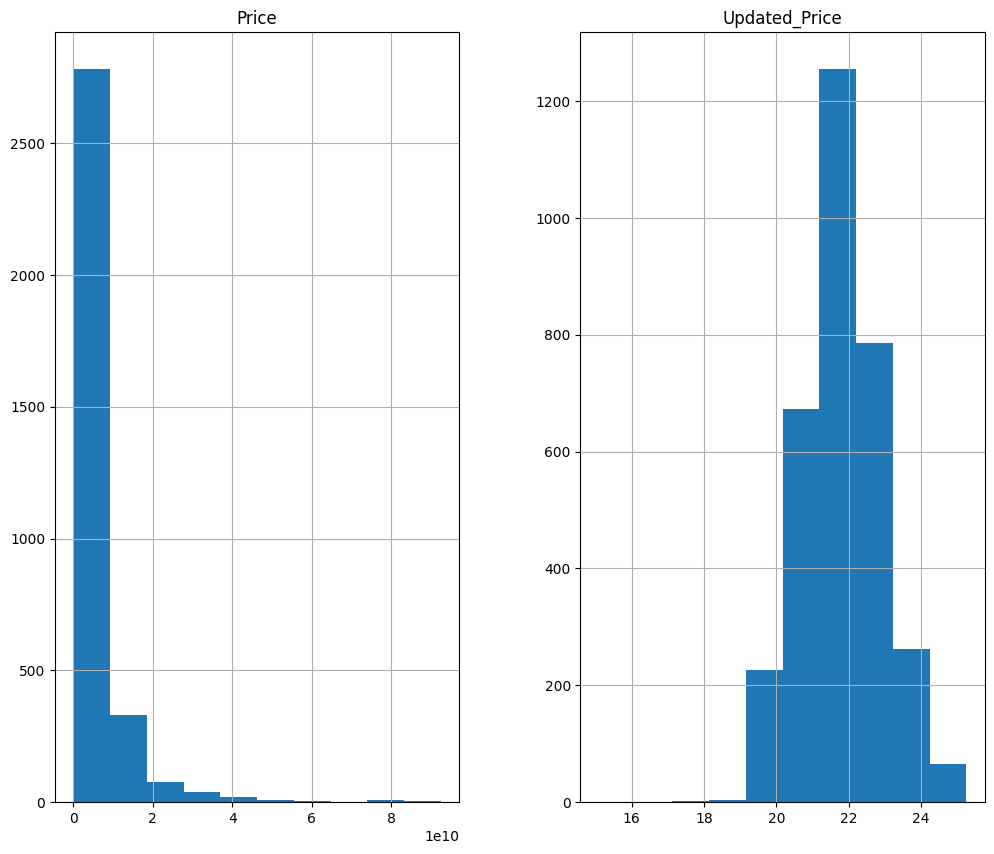

In [78]:
# 5(a) Implementasi code di sini
df[['Price','Updated_Price']].hist(figsize=(12,10))

**Soal 5(b)**: Coba jelaskan apa perubahan yang terjadi pada fitur Price/Price(USD) berdasarkan analisis terhadap visualisasi yang telah kalian buat!

> Berikan jawaban Anda di sini :
Setelah data ditranform dengan menggunakan interpretasi log, distribusi data yang awalnya sangat berantakan (left skewed) menjadi cenderung normal karena data tersebut diubah scalingnya agar menjadi lebih dekat (contoh : 1000 dan 5000 kalau discale dengan scala 1000 menjadi 1 dan 5) sehingga gapnya tidak begitu jauh dan data menjadi lebih rapih.

## Penanganan Missing Value

Tidak jarang kita menemukan dataset dengan banyak nilai yang hilang (missing values). Biasanya kita bisa mengidentifikasi nilai tersebut dalam format: 'NaN', '?', 'T/A', atau hanya sebuah sel kosong di dataset. Penyebab dari missing value sendiri beragam, bisa diakibatkan oleh *data corruption* atau kesalahan pada saat *data recording*.

Untuk menangani missing values pada atribut tertentu, pertama-tama kita perlu melihat jenis data yang disimpan oleh atribut tersebut, apakah numerik atau kategorikal?

*   Jika data numerik, maka dapat diisi dengan nilai mean, median, ataupun modus bergantung pada asumsi yang umumnya didasarkan pada bentuk distribusi data
*   Jika data kategorikal (jenis datanya nominal atau ordinal), maka dapat diisi dengan nilai modus

Selanjutnya, baik pada data numerik ataupun kategorikal, kita dapat melakukan imputasi (penggantian nilai) dengan nilai konstanta berdasarkan asumsi atau algoritma yang kita buat. Pilihan lainnya adalah untuk menghapus data (row) atau bahkan atribut tersebut (column), jika kita merasa missing value tersebut tidak memiliki efek yang besar terhadap pemodelan Machine Learning.



In [79]:
# Fungsi untuk mengecek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df)

         Total   Percent
Address     23  0.702934
Area         8  0.244499


Selain itu, atribut dapat di-*drop* apabila:
* Atribut tidak intuitif
* Atribut mempunyai banyak missing values.
* Atribut tidak informatif.
* Atribut dapat membahayakan untuk model tertentu.
* Atribut tersebut dapat dihasilkan dari atribut yang lain.
* Atribut sulit untuk digeneralisir seperti ID

**Soal 6** : Berdasarkan operasi di atas, kita melihat bahwa terdapat 2 atribut yang memiliki missing values. Apa yang dapat Anda lakukan pada kedua atribut tersebut? (Berikan sedikit argumentasi singkat)

In [80]:
# 6 Implementasi code di sini
# Karena data yang bersifat missing atau NaN hanyalah sedikit dibawah 1
# (untuk address ada 23 dari 3272 dan untuk Area hanya ada 8 dari 3272)
df = df[df['Area'] != np.NaN]
df = df[df['Address'] != np.NaN]
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Updated_Price
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,21.338451
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,21.338451
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,20.125429
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,20.620679
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,22.669176
...,...,...,...,...,...,...,...,...,...
3476,63,1,True,True,False,Feiz Garden,1.890000e+09,63000.00,21.359843
3477,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,21.976029
3478,83,2,True,True,True,Niavaran,6.800000e+09,226666.67,22.640188
3480,105,2,True,True,True,Dorous,5.600000e+09,186666.67,22.446032


# Dimensionality Reduction with Principal Component Analysis (PCA)

**Data Transformation**

Tahapan selanjutnya dari Data Pre-processing adalah transformasi data yang di antaranya menyangkut pemilihan fitur untuk pembuatan model. Beberapa pendekatan yang dapat dilakukan untuk data transformation di antaranya : aggregation, sampling, dimensionality reduction, feature subset selection, feature creation, discretization and binarization, dan variable transformation (referensi: [Pre-processing Technique in ML](https://towardsdatascience.com/data-preprocessing-in-data-mining-machine-learning-79a9662e2eb)). Pada Lab kali ini kita akan mempelajari dimensionality reduction menggunakan teknik PCA.

**Introduction to PCA**

PCA atau Principal Component Analysis merupakan teknik reduksi dimensi yang dilakukan untuk mentransformasi data dengan dimensi tinggi ke dimensi yang lebih rendah (mengurangi kompleksitas fitur). Secara matematis, teknik ini akan mentransformasi data ke dalam sistem koordinat baru dimana principal component pertama akan memiliki nilai variansi data yang lebih besar dibandingkan principal component kedua, dan seterusnya. (Baca selengkapnya pada PPT PCA yang terdapat di scele).

## Deskripsi Dataset

Pada latihan PCA ini, kita akan menggunakan iris dataset.
Terdapat tiga nilai target yang mungkin: 0 untuk Iris setosa, 1 untuk Iris versicolor, dan 2 untuk Iris virginica.

In [81]:
# Import dataset
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import some data to play with
iris = datasets.load_iris()

In [82]:
df_pca = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_pca

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [83]:
# Melihat shape dari dataframe
total_rows, total_attributes = df_pca.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data: 150
Jumlah atribut: 5


In [84]:
# Melihat nama atribut dalam dataframe
print("-----Berikut adalah daftar kolom/attribut dalam dataset-----")
print()
print(df_pca.columns)

-----Berikut adalah daftar kolom/attribut dalam dataset-----

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [85]:
print("-----Berikut adalah daftar class pada target variabel-----")
df_pca['target'].value_counts()

-----Berikut adalah daftar class pada target variabel-----


0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [86]:
# Melihat 5 elemen teratas dalam dataframe
df_pca.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


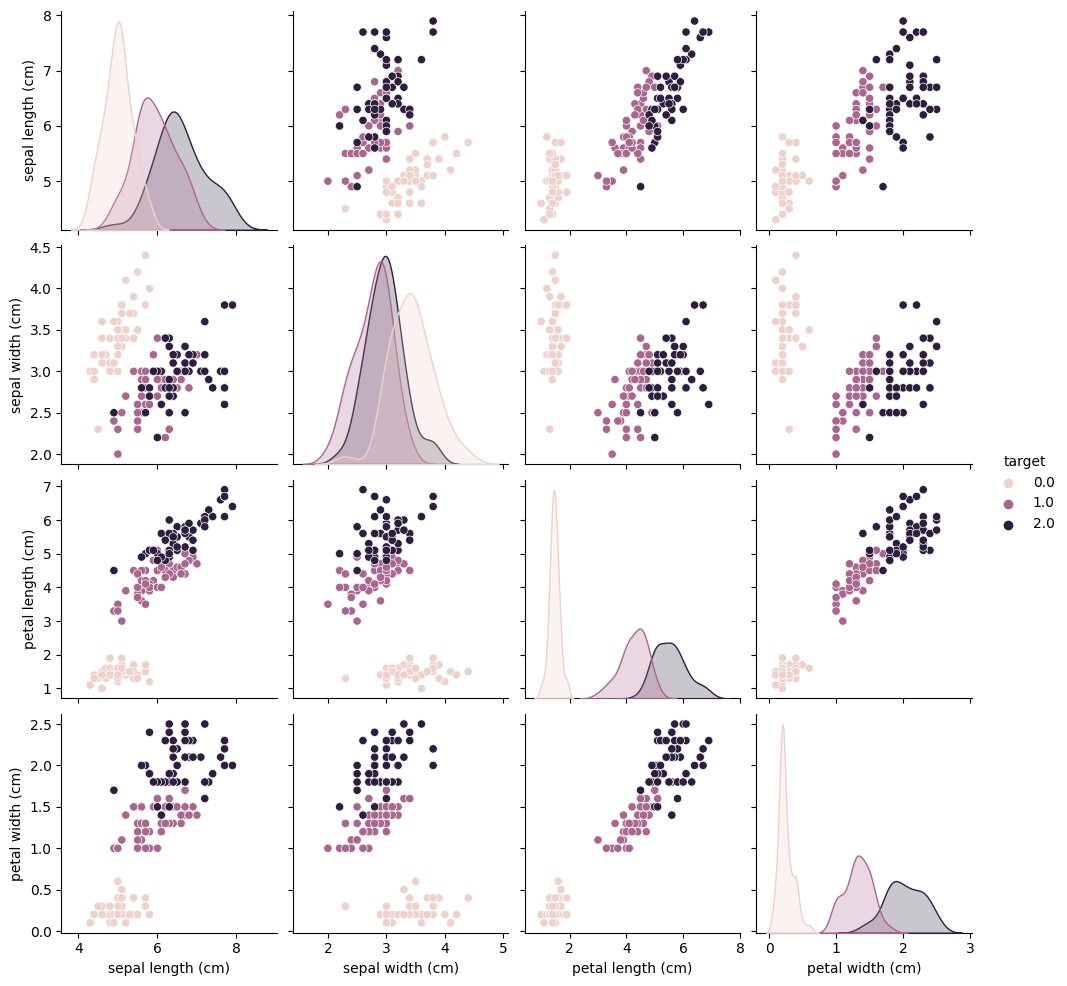

In [87]:
p=sns.pairplot(df_pca, hue = 'target')
# 1: Setosa
# 2: Versicolor
# 3: Virginica

Dari plot, terlihat bahwa setiap spesies bunga memiliki cluster masing-masing dari berbagai kombinasi fitur. Menurut Kalian, mana pasangan fitur yang memiliki nilai kovarians tertinggi? mana yang terendah?

## Tahapan PCA

In [88]:
from sklearn.decomposition import PCA

# Muat dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Lakukan penskalaan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan analisis PCA dengan hanya mengambil satu komponen utama
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [89]:
X_pca.shape

(150, 4)

In [90]:
# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

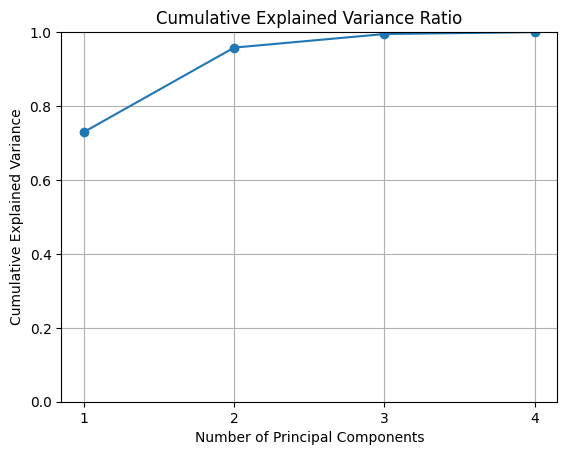

In [91]:
# Hitung cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Buat plot cumulative explained variance ratio
plt.plot(range(1, 5), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 5))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Dari plot di atas, terlihat bahwa lebih dari 95% varians sudah dijelaskan oleh 2 komponen utama.

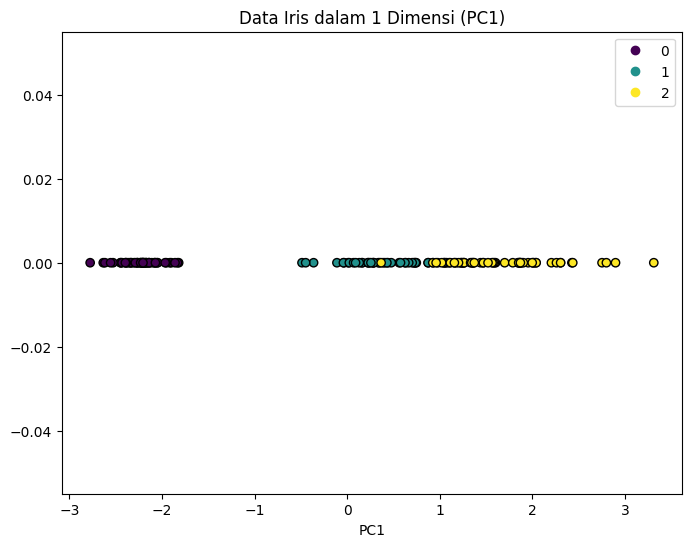

In [92]:
# Lakukan penskalaan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan analisis PCA dengan hanya mengambil satu komponen utama
pca_1 = PCA(n_components=1)
X_pca_1 = pca_1.fit_transform(X_scaled)

# Buat plot data dengan warna ungu yang sesuai dengan kelasnya
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_1, np.zeros_like(X_pca_1), c=y, cmap='viridis', edgecolor='k')
plt.legend(*scatter.legend_elements())
plt.xlabel('PC1')
plt.title('Data Iris dalam 1 Dimensi (PC1)')

plt.show()

Dapat dilihat bahwa kelas 0 telah membentuk cluster sendiri, tetapi terdapat cukup banyak titik data yang tumpang tindih antara kelas 1 dan 2 (sudah cukup sesuai dengan analisis pairplot diawal). Hal ini disebabkan oleh fakta bahwa satu komponen utama (PC1) sudah dapat menjelaskan sekitar 70% dari variasi dalam data.

In [93]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


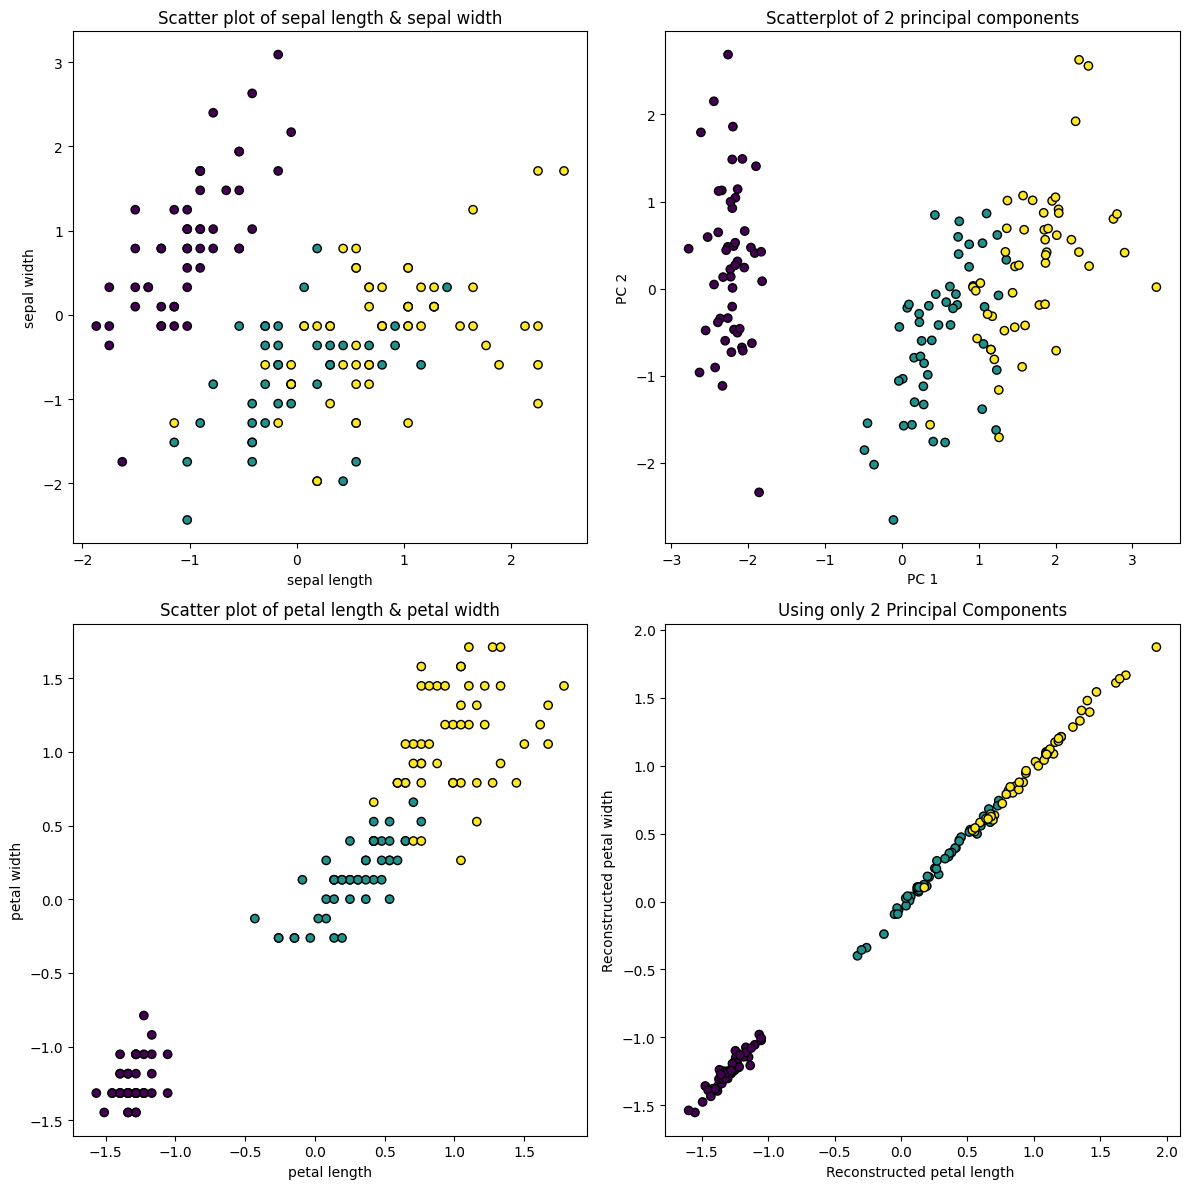

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA dengan 1 komponen
pca1 = PCA(n_components=1)
X_pca1 = pca1.fit_transform(X_scaled)

# PCA dengan 2 komponen
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

# PCA dengan 3 komponen
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

# Rekonstruksi Data hanya dengan 2 komponen
X_reconstructed1 = np.dot(X_pca1, pca1.components_)

# Rekonstruksi Data hanya dengan 2 komponen
X_reconstructed2 = np.dot(X_pca2, pca2.components_)

# Rekonstruksi Data hanya dengan 3 komponen
X_reconstructed3 = np.dot(X_pca3, pca3.components_)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Scatter plot of sepal length & sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.subplot(2, 2, 2)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Scatterplot of 2 principal components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.subplot(2, 2, 3)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y, cmap='viridis', edgecolor='k')
plt.title('Scatter plot of petal length & petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.subplot(2, 2, 4)
X_reconstructed1 = pca2.inverse_transform(X_pca2)
plt.scatter(X_reconstructed1[:, 2], X_reconstructed1[:, 3], c=y, cmap='viridis', edgecolor='k')
plt.title('Using only 2 Principal Components')
plt.xlabel('Reconstructed petal length ')
plt.ylabel('Reconstructed petal width')

plt.tight_layout()
plt.show()

**Soal 7** : Dari kedua plot pada baris pertama, apa pendapat Anda tentang perbedaan feature selection dan feature reduction?


> Berikan jawaban Anda di sini

Pendapat saya mengenai feature selection dan featur reduction adalah mereka tetap memoertahankan informasi dari data yang sudah diproses tersebut. Dapat dilihat pada bentuk scatter plotnua yang cenderung mirip sehingga keduanya dapat digunakan dengan baik tergantung case yang ditemukan. Feature selection yang dimana hanya melakukan komputasi berdasaekan fitur fitur yang kita pilih dan cocok digunakan ketika ada fitur yang jelas jelas tidak memiliki korelasi sehingga dapat kita select.
Feature reduction yang akan melakukan komputasi dengan keseluruhan fitur sehingga menciptakan dimensi yang yang lebih rendah yang tetap mempertahankan infomasi awal tersebut ini cocok digunakan ketika ada > 1 fitur yang dapat direpresentasikan dengan 1 fitur sehingga functionnya akan meleburnya menjadi 1 fitur tersebut.

**Soal 8** : Dari kedua plot pada beris terakhir, apa pendapat Anda tentang rekonstruksi data dengan hanya menggunakan 2 PC? Jika digunakan 3 atau 4 PC, bagaimana hasilnya?

> Berikan jawaban Anda di sini
Berdasarkan diagram cumulative explained variance ratio, dengan menggunakan reduksi 2PC saja sudah dapat melakukan klasifikasi dengan baik hingga persentasi 95%. Jika dilakukan dengan 3PC atau 4PC, hasilnya akan semakin mendekati mutlak atau lebih spesifik untuk melakukan klasifikasinya. Pada case ini, ketika PC = 4 == Jumlah fitur, maka akan merepresentasikan seluruh fiturnya yang berarti klasifikasinya semakin mutlak.

**Soal 9** : Menurut Anda, kapan PCA perlu dilakukan? (Dapat memberikan referensi)
> Berikan jawaban Anda di sini

### [Referensi] https://algorit.ma/blog/principal-component-analysis-2022/
PCA dapat dilakukan ketika kita ingin melakukan reduksi fitur, tetapi tidak mengetahui fitur apa yang ingin dibuang. Maka daripada itu, PCA dapat dilakukan sekaligus mencari tahu apakah terdapat fitur (yang saling memiliki korelasi tinggi) yang dapat direpresentasikan dengan dimensi yang lebih rendah sehingga dapat mengurangi kompleksitas komputasi

